In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.shape

(30, 2)

In [4]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
df;

In [6]:
x = df[['YearsExperience']]

In [7]:
y =df['Salary']

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(x,y)

LinearRegression()

In [11]:
lr.score(x,y)

0.9569566641435086

In [12]:
# polynomial

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(degree = 12)

In [15]:
x_poly = poly.fit_transform(x)

In [16]:
x_poly;

In [17]:
lr.fit(x_poly,y)

LinearRegression()

In [18]:
lr.score(x_poly,y)

0.9830431165773489

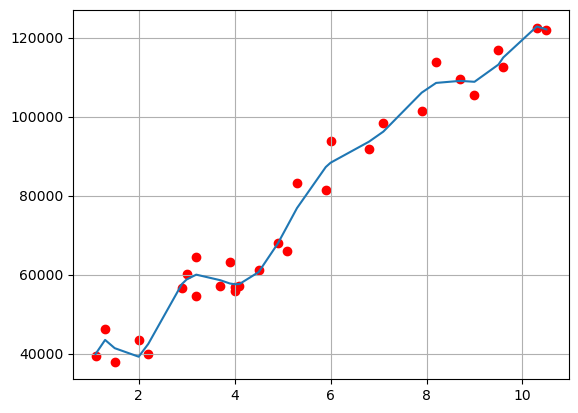

In [19]:
plt.scatter(x,y,color = 'red')
plt.plot(x,lr.predict(x_poly));
plt.grid()

In [20]:
# BUstoonHousing.csv

In [21]:
# using forward feature selection build the muiltiple regression model
# do the cross validation as well
# get the r2 score and mae
# response variable -> medv

In [22]:
df1 = pd.read_csv('BostonHousing.csv')

In [23]:
df1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [24]:
df1.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [25]:
df1.shape

(506, 14)

In [26]:
from sklearn.feature_selection import SequentialFeatureSelector

In [27]:
# select the best Feature using forward selection
fs = SequentialFeatureSelector(LinearRegression(), direction = 'forward',)

In [28]:
# Separate features and target
x = df1 .drop('medv' , axis = 1 )
y = df1['medv']

In [29]:
# biuld the model
fs.fit(x,y)

SequentialFeatureSelector(estimator=LinearRegression())

In [30]:
fs .get_support()

array([ True, False, False,  True, False,  True, False, False, False,
       False,  True,  True,  True])

In [31]:
# get selected columns
x = x.iloc[:, fs.get_support()]  

In [32]:
x

,crim,chas,rm,ptratio,b,lstat
0,0.00632,0,6.575,15.3,396.90,4.98
1,0.02731,0,6.421,17.8,396.90,9.14
2,0.02729,0,7.185,17.8,392.83,4.03
3,0.03237,0,6.998,18.7,394.63,2.94
4,0.06905,0,7.147,18.7,396.90,5.33
...,...,...,...,...,...,...
501,0.06263,0,6.593,21.0,391.99,9.67
502,0.04527,0,6.120,21.0,396.90,9.08
503,0.06076,0,6.976,21.0,396.90,5.64
504,0.10959,0,6.794,21.0,393.45,6.48


In [33]:
# cross validation
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0, test_size = 0.25)

In [37]:
x_train.shape

(379, 6)

In [41]:
y_train.shape

(379,)

In [35]:
# create a linear regression model
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()

In [42]:
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
# get prediction from cross- validation
y_pred = lr.predict(x_test)

In [50]:
y_pred;

In [46]:
from sklearn.metrics import mean_absolute_error , r2_score

In [47]:
# # Calculate MAE and R² for predictions
mean_absolute_error(y_test,y_pred)

3.990603179166698

In [48]:
r2_score(y_test,y_pred)

0.5625618918816184